In [94]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Question 13

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

In [95]:
np.random.seed(1)

## Part A

Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a $N(0,1)$ distribution. This represents a feature, $X$.

An $N(X,Y)$ distribution is a normal distribution with $\text{mean}=X$ and $\text{std dev}=Y$.

In [96]:
x = np.random.normal(loc=0, scale=1, size=100)

## Part B

Using the `normal()` method, create a vector, `eps`, containing $100$ observations drawn from a $N(0,0.25)$ distribution -- a normal distribution with mean zero and variance $0.25$.

In [97]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

## Part C

Using `x` and `eps`, generate a vector `y` according to the model
$$Y =−1+0.5X+\epsilon.$$
What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [98]:
y = -1 + (0.5 * x) + eps

print(f"The length of vector y is {len(y)}.")
print("The value of beta 0 is 1 and the value of beta_1 is 0.5 in this linear model.")

The length of vector y is 100.
The value of beta 0 is 1 and the value of beta_1 is 0.5 in this linear model.


## Part D

Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

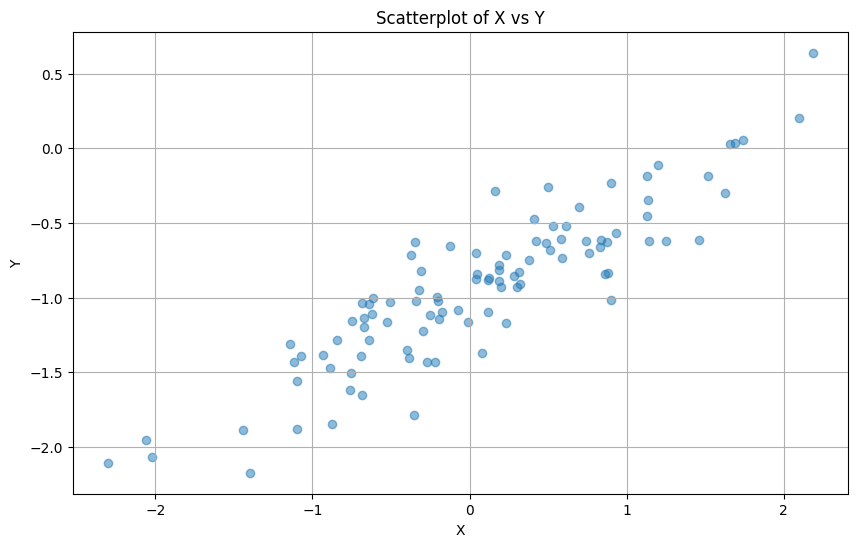

In [99]:
plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.5)

plt.title('Scatterplot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

There appears to be a linear relationship present between $X$ and $Y$, where $\hat{\beta}_1$ is approximately $0.5$ and $\hat{\beta}_0$ is approximately $-1$.

## Part E

Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?

In [100]:
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           5.39e-36
Time:                        20:51:33   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.0

$\hat{\beta}_0$ is $-0.962$ which is very close to the real value of $\beta_0$ of $-1$. Similarly, $\hat{\beta}_1$ is $-0.523$ which is very close to the real value of $\beta_1$ of $0.5$.

## Part F

Display the elast squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

(100,) (100, 2)


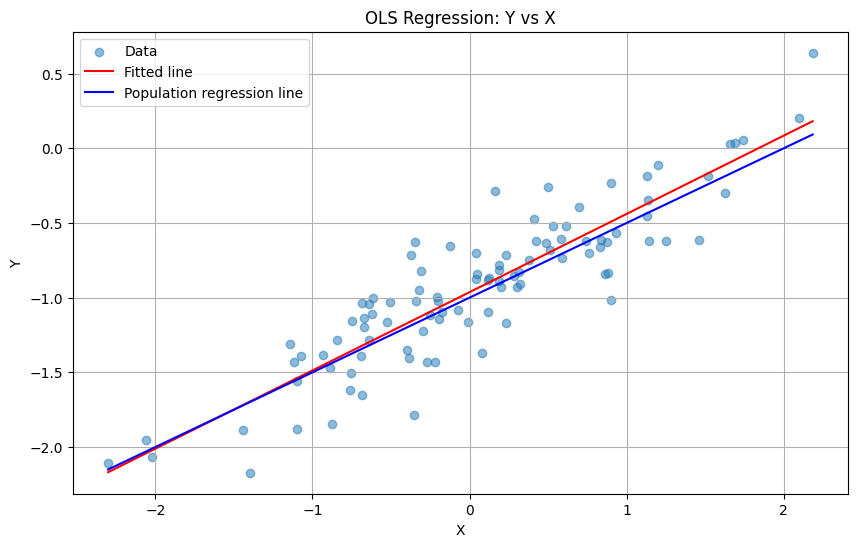

In [101]:
plt.figure(figsize=(10, 6))

# plot sample x, y values
plt.scatter(x, y, alpha=0.5, label='Data')

x_sorted = np.sort(x)
X_sorted = sm.add_constant(x_sorted)
print(x_sorted.shape, X_sorted.shape)

# Plot the fitted line
plt.plot(x_sorted, results.predict(X_sorted), color='red', label='Fitted line')

# plot the population line
y_population = -1 + 0.5 * x_sorted 
plt.plot(x_sorted, y_population, color='blue', label='Population regression line')

plt.title('OLS Regression: Y vs X')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

## Part G

Now fit a polynomial regression model that predicts `y` using `x` and `x^2`. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [102]:
X_QUAD= sm.add_constant(np.column_stack((x, x**2)))

quad_model = sm.OLS(y, X_QUAD)
quad_results = quad_model.fit()

print(quad_results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.32e-34
Time:                        20:51:33   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9663      0.029    -33.486      0.0

No, there is no evidence that the quadratic term is improving the models fit. In fact, the $\text{p-value}$ for the quadratic term $x^2$ is $0.856$ which is higher than the statistical significance level of $0.05$, showing that this variable is not statistically significant. As a consequence of this, the confidence interval for the `x2` term includes $0$, meaning that it is possible that the true value of `x_2` is $0$.

## Part H

Repeat (a)-(f) after modifying the data generation process in such a way that there is *less* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results. 

The length of vector y is 100.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1074.
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.32e-54
Time:                        21:04:41   Log-Likelihood:                 61.715
No. Observations:                 100   AIC:                            -119.4
Df Residuals:                      98   BIC:                            -114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9901      0.013    -74.907      0.000      -1.016      -0.964
x1             0.4882      0.015     32.769      0.000       0.459       0.518
==============================================================================
Omnibus:                        0.186   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.083
Skew:                           0.070   Prob(JB):                        0.959
Kurtosis:                       2.993   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

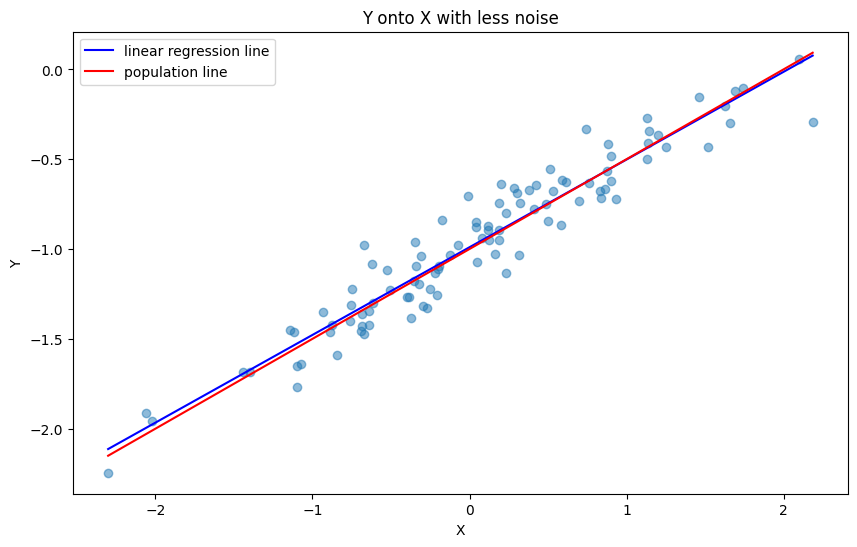

In [125]:
# ln stands for less noise
ln_eps = np.random.normal(loc=0, scale=0.125, size=100)

# rewrite equation for y
ln_y = -1 + (0.5 * x) + ln_eps
ln_X = sm.add_constant(x)

# create and fit model
ln_model = sm.OLS(ln_y, ln_X)
ln_results = ln_model.fit()

ln_x_sorted = np.sort(x)
ln_X_sorted = sm.add_constant(ln_x_sorted)

# plot data
plt.figure(figsize=(10,6))
plt.scatter(x, ln_y, alpha=0.5)
plt.plot(ln_x_sorted, ln_results.predict(ln_X_sorted), color='blue', label='linear regression line')
plt.plot(ln_x_sorted, -1 + (0.5 * ln_x_sorted), color='red', label='population line')
plt.legend()
plt.title('Y onto X with less noise')
plt.xlabel('X')
plt.ylabel('Y')

print(f"The length of vector y is {ln_y.shape[0]}.")
ln_results.summary()

W can see based on the p-values, that both the coefficients are statistically significant (< 0.05). Furthermore, we can tell by the actual coefficient values (which are both greater than 0), that they are having an effect on the value of Y. Finally, the R-squared value of $0.916$, which is close to $1$ shows that a large portion of the variance in the response is explained by the model. 

## Part I

Repeat (a)-(f) after modifying the data generation process in such a way that there is *more* noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results. 

The length of vector y is 100.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     90.39
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.42e-15
Time:                        21:04:12   Log-Likelihood:                -67.551
No. Observations:                 100   AIC:                             139.1
Df Residuals:                      98   BIC:                             144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9963      0.048    -20.695      0.000      -1.092      -0.901
x1             0.5159      0.054      9.507      0.000       0.408       0.624
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.690
Skew:                           0.081   Prob(JB):                        0.708
Kurtosis:                       2.627   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

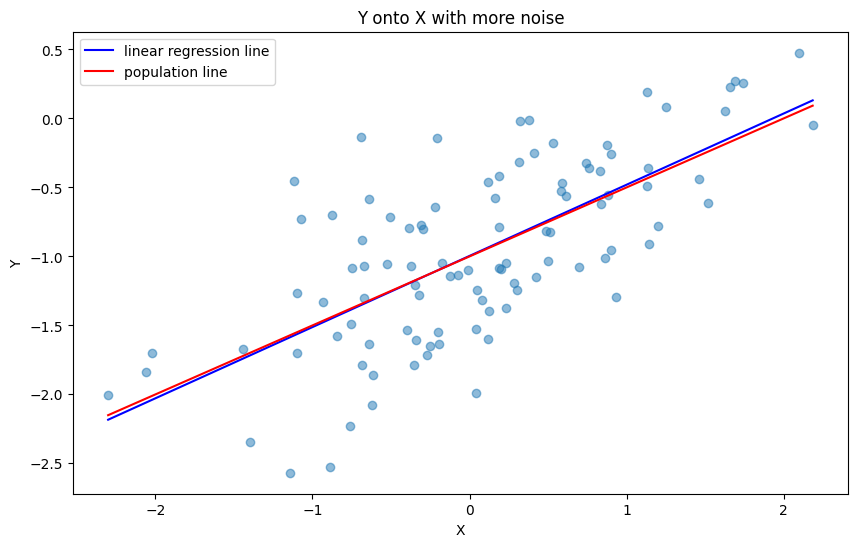

In [124]:
# mn stands for more noise -- double noise
mn_eps = np.random.normal(loc=0, scale=0.5, size=100)

# rewrite equation for y
mn_y = -1 + (0.5 * x) + mn_eps
mn_X = sm.add_constant(x)

# create and fit model
mn_model = sm.OLS(mn_y, mn_X)
mn_results = mn_model.fit()

mn_x_sorted = np.sort(x)
mn_X_sorted = sm.add_constant(mn_x_sorted)

# plot data
plt.figure(figsize=(10,6))
plt.scatter(x, mn_y, alpha=0.5)
plt.plot(mn_x_sorted, mn_results.predict(mn_X_sorted), color='blue', label='linear regression line')
plt.plot(mn_x_sorted, -1 + (0.5 * mn_x_sorted), color='red', label='population line')
plt.legend()
plt.title('Y onto X with more noise')
plt.xlabel('X')
plt.ylabel('Y')

print(f"The length of vector y is {mn_y.shape[0]}.")
mn_results.summary()

Here we can see that both the parameters are statistically signficant as their p-values are less than $0.05$. Furthermore, we can also see that the coefficients are non-zero, meaning that they are contributing to the response. However, here the R-squared value is much lower at 0.480, meaning that only about $48\%$ of the variance in the response is explained by the model. This is due to the larger variance present in the data which the model is not able to capture. 

## Part J

What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [132]:
print("The 95% confidence intervals for beta_0 and beta_1 for each data set are as follows:")
print(f"Original Data Set   | beta_0: {results.conf_int(alpha=0.05)[0]}, beta_1: {results.conf_int(alpha=0.05)[1]}")
print(f"Less Noise Data Set | beta_0: {ln_results.conf_int(alpha=0.05)[0]}, beta_1: {ln_results.conf_int(alpha=0.05)[1]}")
print(f"More Noise Data Set | beta_0: {mn_results.conf_int(alpha=0.05)[0]}, beta_1: {mn_results.conf_int(alpha=0.05)[1]}")

The 95% confidence intervals for beta_0 and beta_1 for each data set are as follows:
Original Data Set   | beta_0: [-1.00987048 -0.91662275], beta_1: [0.47130669 0.57640688]
Less Noise Data Set | beta_0: [-1.01628327 -0.9638251 ], beta_1: [0.45860524 0.51773123]
More Noise Data Set | beta_0: [-1.09186835 -0.90079127], beta_1: [0.40820811 0.62357247]


The confidence intervals for each data set represent how confidently we can guarantee that the true values exists within the interval. We can roughly see that the width of each interval relates as follows: less_noise < original < more_noise. This is due to the increasing variance in the error values of each of the population lines. This results in the model being less confidently able to predict the estimated values of the parameters. 